In [98]:
import pandas as pd
import matplotlib.pyplot as plt

#### Read in Data

In [42]:
def read_ts(csv):
    df = pd.read_csv(
        f'data/{csv}.csv', 
        usecols = ['month', 'total.total'],
        parse_dates=['month'])
    df.index = df['month'].dt.to_period()
    df.drop(columns = 'month', inplace = True)
    df.columns = [csv]
    return df[csv]

In [43]:
editors = read_ts('editors')
total_views = read_ts('total_views')
legacy_views = read_ts('legacy_views')

C:\Users\slitv\anaconda3\envs\sktimeenv\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\slitv\anaconda3\envs\sktimeenv\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(
C:\Users\slitv\anaconda3\envs\sktimeenv\lib\site-packages\pandas\core\arrays\datetimes.py:1162: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  warnings.warn(


In [44]:
editors.head()
legacy_views.head()
total_views.head()

month
2016-01    9330869593
2016-02    8684367374
2016-03    8802611656
2016-04    8932908573
2016-05    8816345693
Freq: M, Name: total_views, dtype: int64

In [45]:
editors.info()

<class 'pandas.core.series.Series'>
PeriodIndex: 253 entries, 2001-01 to 2022-01
Freq: M
Series name: editors
Non-Null Count  Dtype
--------------  -----
253 non-null    int64
dtypes: int64(1)
memory usage: 4.0 KB


### Merge Data

#### Combine legacy and total views to one series

In [59]:
merged_views = pd.DataFrame({'legacy': legacy_views, 'total_views': total_views})
merged_views.sample(10)

,legacy,total_views
2014-12,9.109282e+09,NaN
2011-03,7.326546e+09,NaN
2021-11,NaN,8.668084e+09
2014-04,7.216245e+09,NaN
2010-03,6.661348e+09,NaN
2019-12,NaN,9.421143e+09
2016-11,NaN,9.292575e+09
2017-03,NaN,9.715995e+09
2012-01,7.808477e+09,NaN
2011-02,6.906249e+09,NaN


In [62]:
views = merged_views.max(axis = 1)
views

2007-12    2.998332e+09
2008-01    4.930903e+09
2008-02    4.818394e+09
2008-03    4.955406e+09
2008-04    5.159162e+09
               ...     
2021-09    9.217505e+09
2021-10    9.168265e+09
2021-11    8.668084e+09
2021-12    8.761074e+09
2022-01    9.676745e+09
Freq: M, Length: 170, dtype: float64

#### Add Editors

In [100]:
df = pd.DataFrame({'editors': editors, 'views': views})
df.head()

,editors,views
2001-01,110,NaN
2001-02,68,NaN
2001-03,164,NaN
2001-04,104,NaN
2001-05,139,NaN


### Plot Series

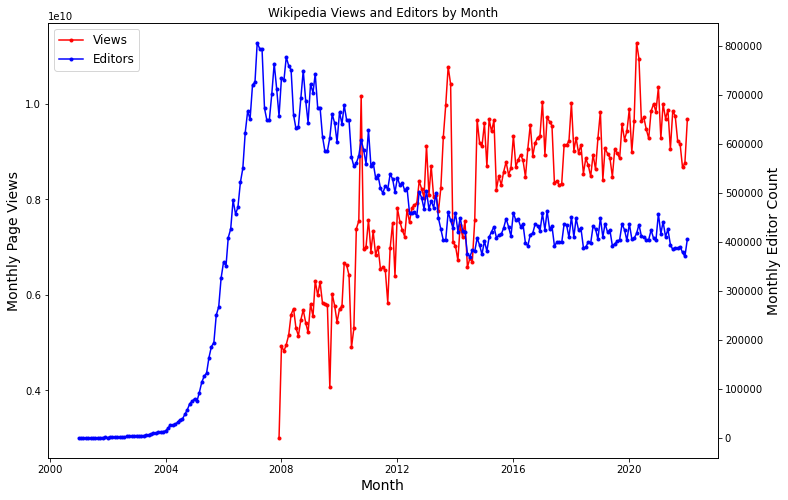

In [104]:
#Used https://pythonguides.com/matplotlib-two-y-axes/ as reference

plt.figure(figsize = (12, 8))

ax1 = plt.axes()
plot_1 = plt.plot(df['views'].to_timestamp(), '.-r', label = 'Views')
ax1.set_ylabel('Monthly Page Views', fontsize = 14)

ax2 = ax1.twinx()
plot_2 = plt.plot(df['editors'].to_timestamp(), '.-b', label = 'Editors')
ax2.set_ylabel("Monthly Editor Count", fontsize = 14)

ax1.set_xlabel('Month', fontsize = 14)
plt.title('Wikipedia Views and Editors by Month')

lns = plot_1 + plot_2
labels = [l.get_label() for l in lns]
plt.legend(lns, labels, loc = 'upper left', fontsize = 12)
plt.show()